In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [123]:
data_dir = 'data/'
data_basics = 'title_basics.csv.gz'
years_requested = [2000,2001]


## Load in your csv.gz's of results for each year extracted.
    * Concatenate the data into 1 dataframe for the remainder of the analysis.

In [87]:
df = pd.DataFrame()
for YEAR in years_requested:
    dfa = pd.read_csv(f"{data_dir}final_tmdb_data_{YEAR}.csv.gz")
    df = pd.concat([df,dfa])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2934 entries, 0 to 1525
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         2488 non-null   float64
 1   revenue        2488 non-null   float64
 2   certification  790 non-null    object 
 3   tconst         2934 non-null   object 
dtypes: float64(2), object(2)
memory usage: 114.6+ KB


# Exploratory Data Analysis

## Number of movies had at least some valid financial information (values > 0 for budget OR revenue)?

    * 619 movies had at least 1 valid financial field where budget or revenue > 0.
    * Exclude any movies with 0's for budget AND revenue for the remaining visualizations.

In [89]:
df[['budget','revenue']] = df[['budget','revenue']].fillna(0)

In [90]:
filter_0_budget = df['budget'] > 0
filter_0_revenue = df['revenue'] > 0

movie_cnt = df.loc[filter_0_budget | filter_0_revenue].shape
print(f'{movie_cnt[0]} movies had at least 1 valid financial field where budget or revenue > 0.')

619 movies had at least 1 valid financial field where budget or revenue > 0.


In [91]:
df = df.loc[filter_0_budget & filter_0_revenue]
df.head()


,budget,revenue,certification,tconst
5,150000.0,12854953.0,PG,tt0118694
14,120000.0,14904.0,R,tt0120467
16,45000000.0,224834564.0,G,tt0120630
19,8000000.0,105983.0,R,tt0120753
20,125000000.0,546388105.0,PG-13,tt0120755


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?


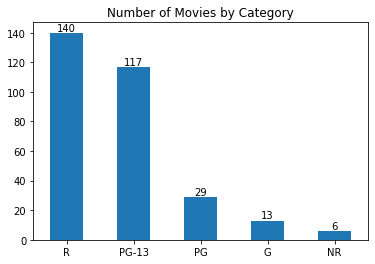

In [120]:
ax = df['certification'].value_counts().plot.bar(x='certification',rot=0)
#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Number of Movies by Category');

## What is the average revenue and budget per certification category?

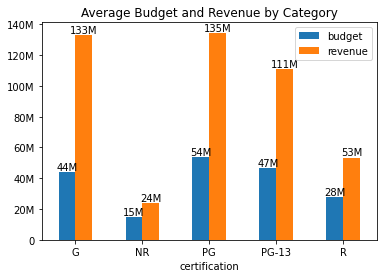

In [149]:
ax = df.groupby('certification').mean().plot.bar(rot=0)

ax.set_title('Average Budget and Revenue by Category')
#https://stackoverflow.com/questions/61330427/set-y-axis-in-millions
def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

#https://stackoverflow.com/questions/70826659/matplotlib-bar-labels-with-new-f-string-format-style?noredirect=1&lq=1
formatter = FuncFormatter(human_format)
for container in ax.containers:
    labels = [  f'{human_format(x,1)}' for x in container.datavalues ]
    ax.bar_label(container,labels=labels)

    
ax.yaxis.set_major_formatter(formatter);
